In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Preprocess Image


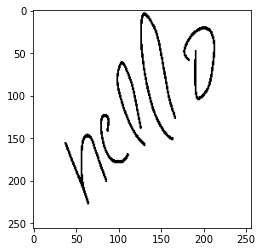

In [2]:
# read, process, and image
img = cv2.imread('samples/hello_english.jpg',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256,256))
img = img[:,:,0] # only use one channel

# thresholding
img[img < 20] = 0
img[img > 20] = 255

# display image
plt.imshow(img, cmap='gray')


In [3]:
# extract all non-zero pixels as coordinates
coords = np.column_stack(np.where(img == 0))
x,y = coords[:,0], coords[:,1]
print(len(x), len(y))

2708 2708


### Perform linear regression on the image


In [4]:
# do linear regression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1)) 
print(model.coef_, model.intercept_)

[[-0.61574463]] [192.77722149]


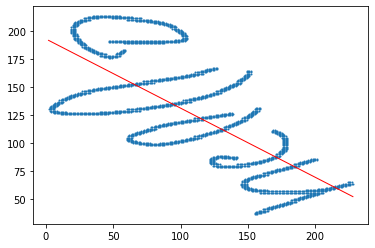

In [5]:
# plot the line with the data
plt.scatter(x, y, s=1)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', linewidth=1)

### Align the plotted line to be parallel to X axis, along with the image


In [6]:
img.shape

(256, 256)

-31.62246139405511


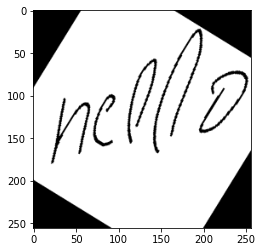

In [15]:
#  Rotate the image by the angle of the line
angle = np.arctan(model.coef_)*180/np.pi
print(angle[0][0])
rows,cols = img.shape

# negative angle means it will rotate clockwise, positive angle means it will rotate counter-clockwise
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle[0][0],1)
dst = cv2.warpAffine(img,M,(cols,rows)) 

plt.imshow(dst,cmap="gray")